1. Con los datos de FIFA, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

**LIBRERIAS A UTILIZAR**



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


**LECTURA DE DATOS**

In [82]:
data= pd.read_csv('/content/fifa_datos.csv')

In [41]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [42]:
Dict = {1: 0, 2: 0, 3: 0, 4: 0}
print(Dict.get(1))

0


In [44]:
for i in range(len(data)):
  weight=str(data['Weight'].values[i])
  value= weight.split('l',1)[0]
  value=float(value)
  if(value<125):
    Dict[1]=Dict.get(1)+1
  elif(value>=125 and value<150):
    Dict[2]=Dict.get(2)+1
  elif(value>=150 and value< 175):
    Dict[3]=Dict.get(3)+1
  elif(value>=175):
    Dict[4]=Dict.get(4)+1

In [45]:
Dict

{1: 42, 2: 2290, 3: 10876, 4: 4952}

In [47]:
x= Dict.keys()
y= Dict.values()
print(x)
print(y)

dict_keys([1, 2, 3, 4])
dict_values([42, 2290, 10876, 4952])


**Genereacion de grafico de pastel**

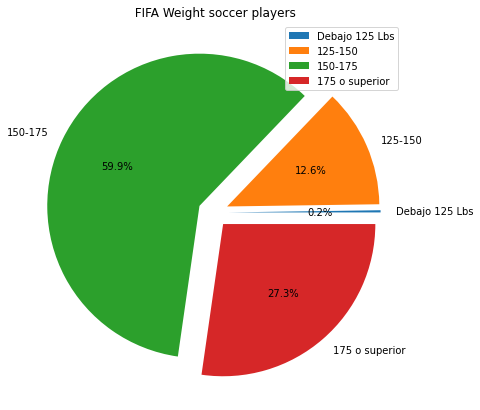

In [59]:

label=["Debajo 125 Lbs","125-150","150-175","175 o superior"]
fig= plt.figure(figsize=(10,7))
myExplode= [0.1,0.1,0.1,0.1]
colors=['maroon','blue','yellow','green']
plt.pie(y,labels=label, explode=myExplode,autopct='%1.1f%%')
plt.title(' FIFA Weight soccer players')
plt.legend()
plt.show()

2. Generar un grafico de barras (histograma) de acuerdo a su habilidad(Overall) en base a los siguientes segmentos contando el numero de jugadores

In [69]:
df_overall= pd.DataFrame(data.groupby(['Overall'])['Overall'].count())
df_overall.columns= ['Count']
df_overall.reset_index(inplace=True)
df_overall.head()

,Overall,Count
0,46,1
1,47,20
2,48,32
3,49,36
4,50,103


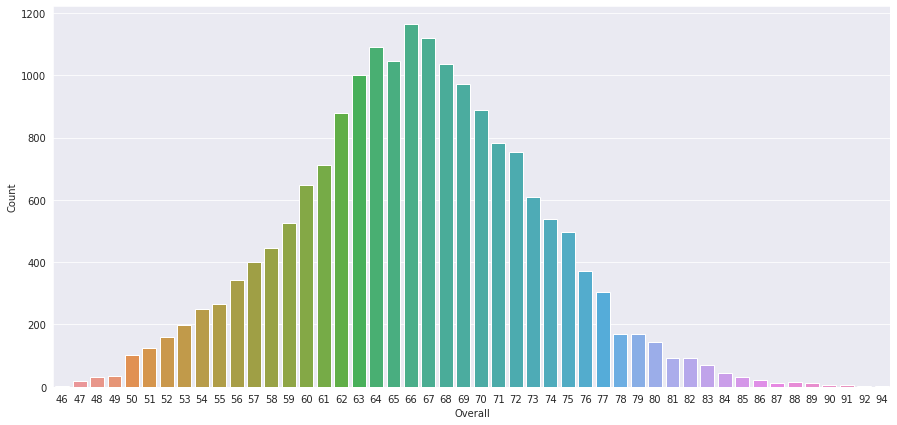

In [85]:

fig= plt.figure(figsize=(15,7))
sns.barplot(x='Overall',y='Count',data= df_overall)
sns.set_style('darkgrid')
plt.show()

Para construir el histograma tomamos los rangos disponibles para calcular la habilidad (Overall) y ademas calculamos el numero de jugadores.

No handles with labels found to put in legend.


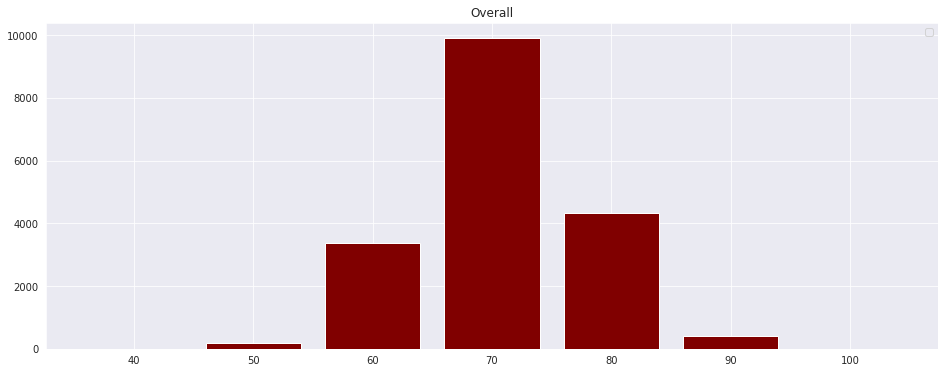

In [96]:
val40 = data.loc[data.Overall <= 40 ].count()[0]
val50 = data.loc[data.Overall < 51 ].count()[0] - data.loc[data.Overall < 41 ].count()[0] 
val60 = data.loc[data.Overall < 61 ].count()[0] - data.loc[data.Overall < 51 ].count()[0] 
val70 = data.loc[data.Overall < 71 ].count()[0] - data.loc[data.Overall < 61 ].count()[0] 
val80 = data.loc[data.Overall < 81 ].count()[0] - data.loc[data.Overall < 71 ].count()[0] 
val90 = data.loc[data.Overall < 91 ].count()[0] - data.loc[data.Overall < 81 ].count()[0] 
val100 = data.loc[data.Overall >= 91 ].count()[0]
results = [val40,val50,val60,val70,val80,val90,val100]
labels = ['40', '50', '60','70', '80', '90', '100']
plt.figure(figsize=(16,6))
plt.title('Overall')
plt.legend()
barras = plt.bar(labels, results,color='maroon')

3. Investigar alguna herramienta o software que permita generar reportes con PYTHON utilizando *CodeLabs*